<a href="https://colab.research.google.com/github/brash99/phys441/blob/master/JupyterNotebooks/TravelingWaveConvection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Burger's Equation in 2D

\begin{equation}
\frac{\partial u}{\partial t} + u \frac{\partial u}{\partial x} + v \frac{\partial u}{\partial y} - \nu \frac{\partial^2 u}{\partial x^2} - \nu \frac{\partial^2 u}{\partial y^2} = 0
\end{equation}

\begin{equation}
\frac{\partial v}{\partial t} + u \frac{\partial v}{\partial x} + v \frac{\partial v}{\partial y} - \nu \frac{\partial^2 v}{\partial x^2} - \nu \frac{\partial^2 v}{\partial y^2} = 0
\end{equation}

where $\nu$ is the viscosity.  As before, we use the forward difference approximation for the time derivative, the backward difference approximation for the first order spatial derivatives, and the central difference approximation for the second order spatial derivatives. 

\begin{equation}
\frac{u_{ij}^{n+1} -  u_{ij}^n}{\Delta t} + u_{ij}^n \left( \frac{u^n_{ij} - u^n_{(i-1)j}}{\Delta x} \right) +  v_{ij}^n \left( \frac{u^n_{ij} - u^n_{i(j-1)}}{\Delta y} \right) - \nu \left( \frac{u^n_{(i+1)j} - 2 u^n_{ij} + u^n_{(i-1)j}}{\Delta x^2} \right) - \nu \left( \frac{u^n_{i(j+1)} - 2 u^n_{ij} + u^n_{i(j-1)}}{\Delta y^2} \right) = 0
\end{equation}

\begin{equation}
\frac{v_{ij}^{n+1} -  v_{ij}^n}{\Delta t} + u_{ij}^n \left( \frac{v^n_{ij} - v^n_{(i-1)j}}{\Delta x} \right) +  v_{ij}^n \left( \frac{v^n_{ij} - v^n_{i(j-1)}}{\Delta y} \right) - \nu \left( \frac{v^n_{(i+1)j} - 2 v^n_{ij} + v^n_{(i-1)j}}{\Delta x^2} \right) - \nu \left( \frac{v^n_{i(j+1)} - 2 v^n_{ij} + v^n_{i(j-1)}}{\Delta y^2} \right) = 0
\end{equation}

And finally, by rearranging, we end up with two coupled equations.  Note that really all we have done here is combine
together the expressions for 2D non-linear convection and 2D diffusion!

\begin{equation}
u_{ij}^{n+1} =  u_{ij}^n - \frac{\Delta t}{\Delta x} u_{ij}^n \left( u^n_{ij} - u^n_{(i-1)j} \right) - v_{ij}^n \frac{ \Delta t}{\Delta y} \left( u^n_{ij} - u^n_{(i-1)j} \right) + \frac{\nu \Delta t}{\Delta x^2} \left( u^n_{(i+1)j} - 2 u^n_{ij} + u^n_{(i-1)j} \right) + \frac{\nu \Delta t}{\Delta y^2} \left( u^n_{i(j+1)} - 2 u^n_{ij} + u^n_{i(j-1)} \right)
\end{equation}

\begin{equation}
v_{ij}^{n+1} =  v_{ij}^n - \frac{\Delta t}{\Delta x} u_{ij}^n \left( v^n_{ij} - v^n_{(i-1)j} \right) - v_{ij}^n \frac{ \Delta t}{\Delta y} \left( v^n_{ij} - v^n_{(i-1)j} \right) + \frac{\nu \Delta t}{\Delta x^2} \left( v^n_{(i+1)j} - 2 v^n_{ij} + v^n_{(i-1)j} \right) + \frac{\nu \Delta t}{\Delta y^2} \left( v^n_{i(j+1)} - 2 v^n_{ij} + v^n_{i(j-1)} \right)
\end{equation}

In [1]:
# Remember: comments in python are denoted by the pound sign
import numpy as np                            #here we load numpy
from matplotlib import pyplot as plt     #here we load matplotlib
from matplotlib import cm as cm     #here we load matplotlib
import time, sys                         #and load some utilities

In [2]:
#this makes matplotlib plots appear in the notebook (instead of a separate window)
%matplotlib inline                  

In [3]:
# We define the x-axis to start at x=0.0m and end at x=20.0m.
# 
# We specify the number of steps in x (nx), and the number
# of steps in t (nt), and calculate dx and dt based on these choices.

xrange = 2.0
yrange = 2.0
nx = 141
ny = 141
nt = 120

dx = xrange / (nx-1)
dy = yrange / (ny-1)
viscosity = 0.07

sigma = .02
dt = sigma * dx * dy / viscosity
trange = dt*(nt-1)

x = np.linspace(-xrange,xrange,nx)
y = np.linspace(-yrange,yrange,ny)

In [4]:
# Set the wavefunction equal to all ones, initially
u = np.ones((nx,ny))      #numpy function ones()
v = np.ones((nx,ny))      #numpy function ones()

# Simulate a pebble being dropped in a pond.  
v0 = 2.0
for i in range(nx):
    for j in range(ny):
        xc = x[i]
        yc = y[j]
        r = np.sqrt(xc**2+yc**2)
        if (r>=0.5 and r<=1.0):
            u[i,j] = v0*xc/r
            v[i,j] = v0*yc/r
        else:
            u[i,j] = 0
            v[i,j] = 0

#u[int(0.5 / dx):int(1.0 / dx + 1),int(0.5 / dy):int(1.0 / dy + 1)] = 2  #setting u = 2 between 0.5 and 1
#v[int(0.5 / dx):int(1.0 / dx + 1),int(0.5 / dy):int(1.0 / dy + 1)] = 2  #setting u = 2 between 0.5 and 1

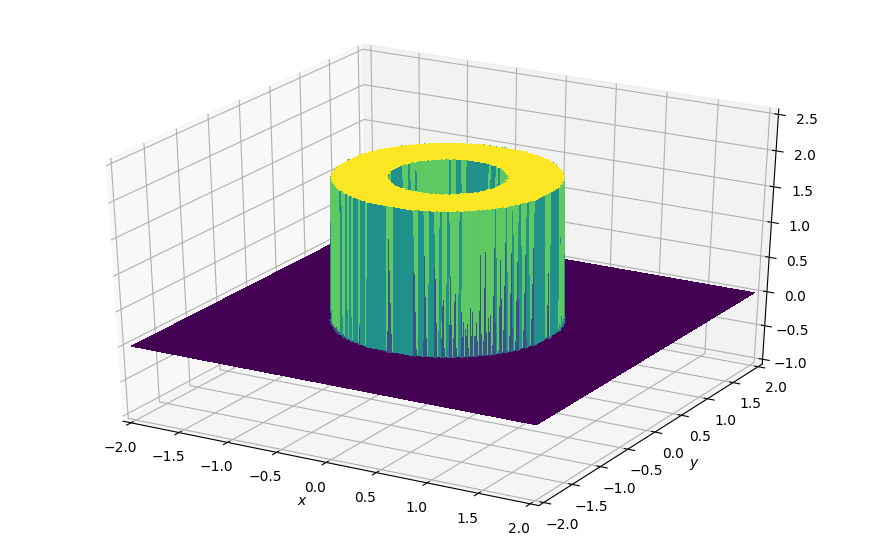

In [5]:
fig = plt.figure(figsize=(11, 7), dpi=100)
ax = fig.gca(projection='3d')
X, Y = np.meshgrid(x, y)
surf = ax.plot_surface(X, Y, np.sqrt(u**2+v**2), rstride=1, cstride=1, cmap=cm.viridis,
        linewidth=0, antialiased=False)

ax.set_xlim(-xrange, xrange)
ax.set_ylim(-yrange, yrange)
ax.set_zlim(-1.0, 2.5)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$');

In [6]:
###Run through nt timesteps
def burger(nt):
    v0 = 2.0
    for i in range(nx):
        for j in range(ny):
            xc = x[i]
            yc = y[j]
            r = np.sqrt(xc**2+yc**2)
            if (r>=0.5 and r<=1.0):
                u[i,j] = v0*xc/r
                v[i,j] = v0*yc/r
            else:
                u[i,j] = 0.0
                v[i,j] = 0.0
    
    for n in range(nt + 1): ##loop across number of time steps
        un = u.copy()
        vn = v.copy()

        u[1:-1, 1:-1] = (un[1:-1, 1:-1] -
                     dt / dx * un[1:-1, 1:-1] * 
                     (un[1:-1, 1:-1] - un[1:-1, 0:-2]) - 
                     dt / dy * vn[1:-1, 1:-1] * 
                     (un[1:-1, 1:-1] - un[0:-2, 1:-1]) + 
                     viscosity * dt / dx**2 * 
                     (un[1:-1,2:] - 2 * un[1:-1, 1:-1] + un[1:-1, 0:-2]) + 
                     viscosity * dt / dy**2 * 
                     (un[2:, 1:-1] - 2 * un[1:-1, 1:-1] + un[0:-2, 1:-1]))
    
        v[1:-1, 1:-1] = (vn[1:-1, 1:-1] - 
                     dt / dx * un[1:-1, 1:-1] *
                     (vn[1:-1, 1:-1] - vn[1:-1, 0:-2]) -
                     dt / dy * vn[1:-1, 1:-1] * 
                    (vn[1:-1, 1:-1] - vn[0:-2, 1:-1]) + 
                     viscosity * dt / dx**2 * 
                     (vn[1:-1, 2:] - 2 * vn[1:-1, 1:-1] + vn[1:-1, 0:-2]) +
                     viscosity * dt / dy**2 *
                     (vn[2:, 1:-1] - 2 * vn[1:-1, 1:-1] + vn[0:-2, 1:-1]))
     
        u[0, :] = 0.0
        u[-1, :] = 0.0
        u[:, 0] = 0.0
        u[:, -1] = 0.0
    
        v[0, :] = 0.0
        v[-1, :] = 0.0
        v[:, 0] = 0.0
        v[:, -1] = 0.0
        
    fig = plt.figure(figsize=(11, 7), dpi=100)
    ax = fig.gca(projection='3d')
    X, Y = np.meshgrid(x, y)
    #ax.plot_surface(X, Y, u, cmap=cm.viridis, rstride=1, cstride=1)
    #ax.plot_surface(X, Y, v, cmap=cm.viridis, rstride=1, cstride=1)
    ax.plot_surface(X, Y, np.sqrt(u**2+v**2), cmap=cm.viridis, rstride=1, cstride=1)
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$');

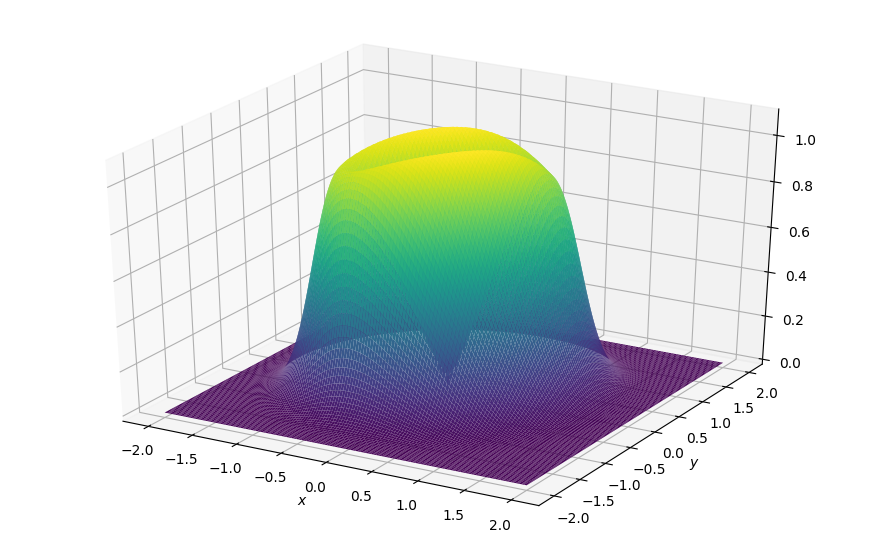

In [7]:
burger(3000)
